House Price Analysis - Complete Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Set plotting parameters
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
df = pd.read_csv('House_predection.csv')

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== FIRST 5 ROWS ===")
display(df.head())

print("\n=== DATASET INFO ===")
print(df.info())

print("\n=== BASIC STATISTICS ===")
display(df.describe().round(2))

=== DATASET OVERVIEW ===
Dataset shape: (1460, 81)
Memory usage: 3.43 MB

=== FIRST 5 ROWS ===


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [5]:
print("=== DATA QUALITY ASSESSMENT ===")

missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})

print("\nTop 20 columns with missing values:")
display(missing_df[missing_df['Missing Count'] > 0].head(20))

print(f"\nDuplicate rows: {df.duplicated().sum()}")

print(f"\nData types summary:")
print(df.dtypes.value_counts())

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

=== DATA QUALITY ASSESSMENT ===

Top 20 columns with missing values:


,Missing Count,Missing Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageQual,81,5.547945
GarageFinish,81,5.547945
GarageType,81,5.547945



Duplicate rows: 0

Data types summary:
object     43
int64      35
float64     3
Name: count, dtype: int64

Numerical columns: 38
Categorical columns: 43


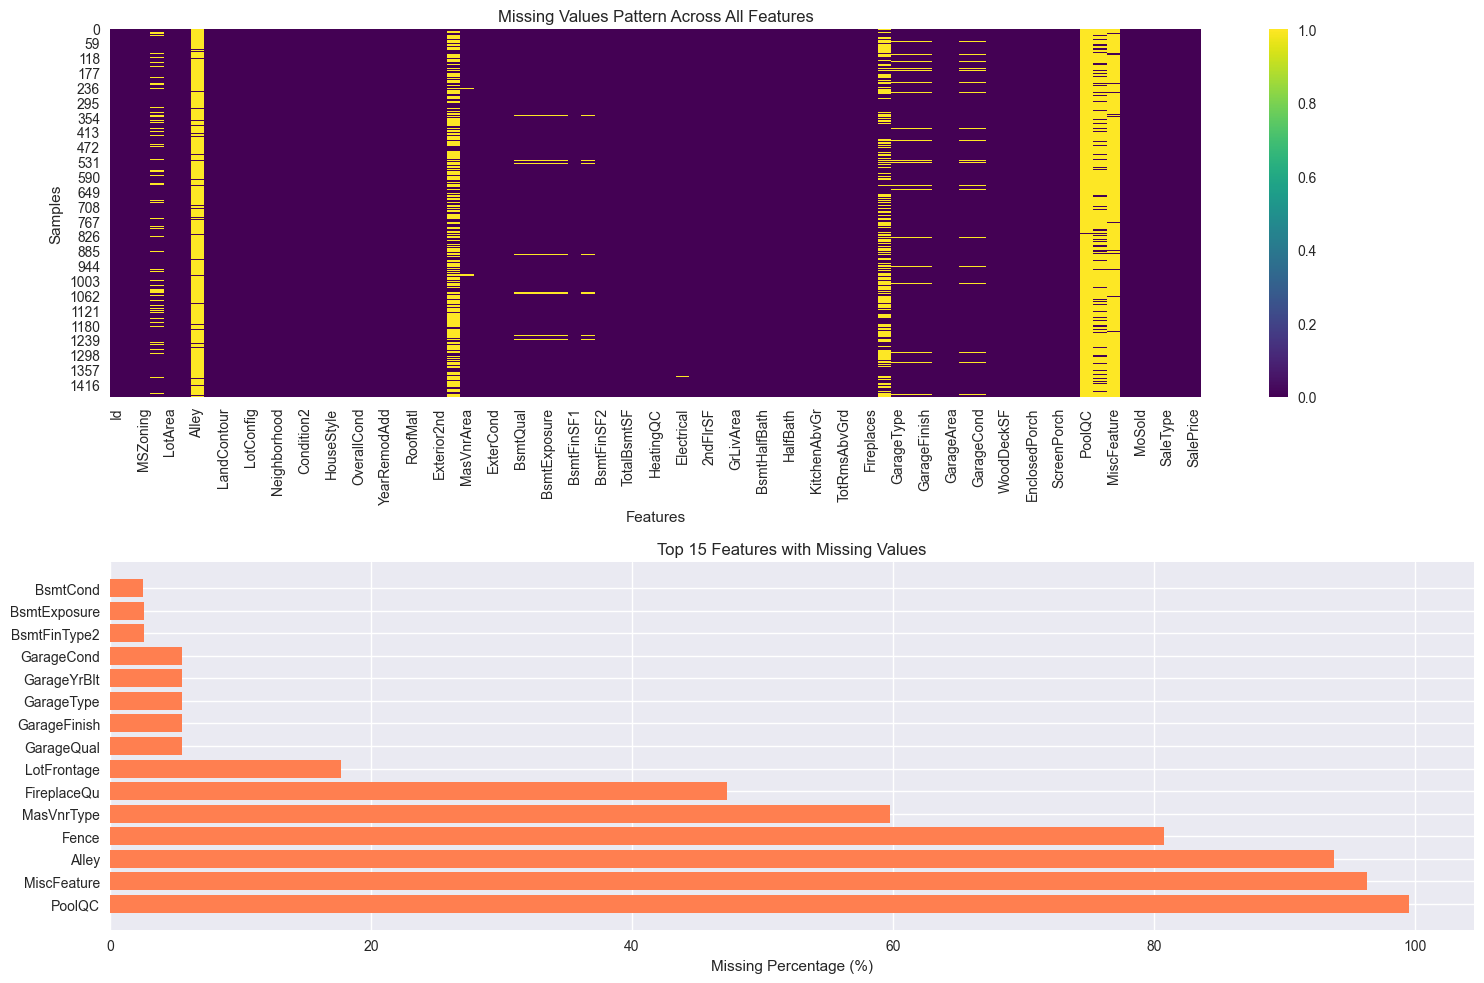

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.heatmap(df.isnull(), cbar=True, cmap='viridis', ax=axes[0])
axes[0].set_title('Missing Values Pattern Across All Features')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Samples')

missing_data_viz = missing_df[missing_df['Missing Count'] > 0].head(15)
axes[1].barh(range(len(missing_data_viz)), missing_data_viz['Missing Percentage'], color='coral')
axes[1].set_yticks(range(len(missing_data_viz)))
axes[1].set_yticklabels(missing_data_viz.index)
axes[1].set_xlabel('Missing Percentage (%)')
axes[1].set_title('Top 15 Features with Missing Values')

plt.tight_layout()
plt.show()

=== SALEPRICE ANALYSIS ===
SalePrice Statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.881
Kurtosis: 6.510


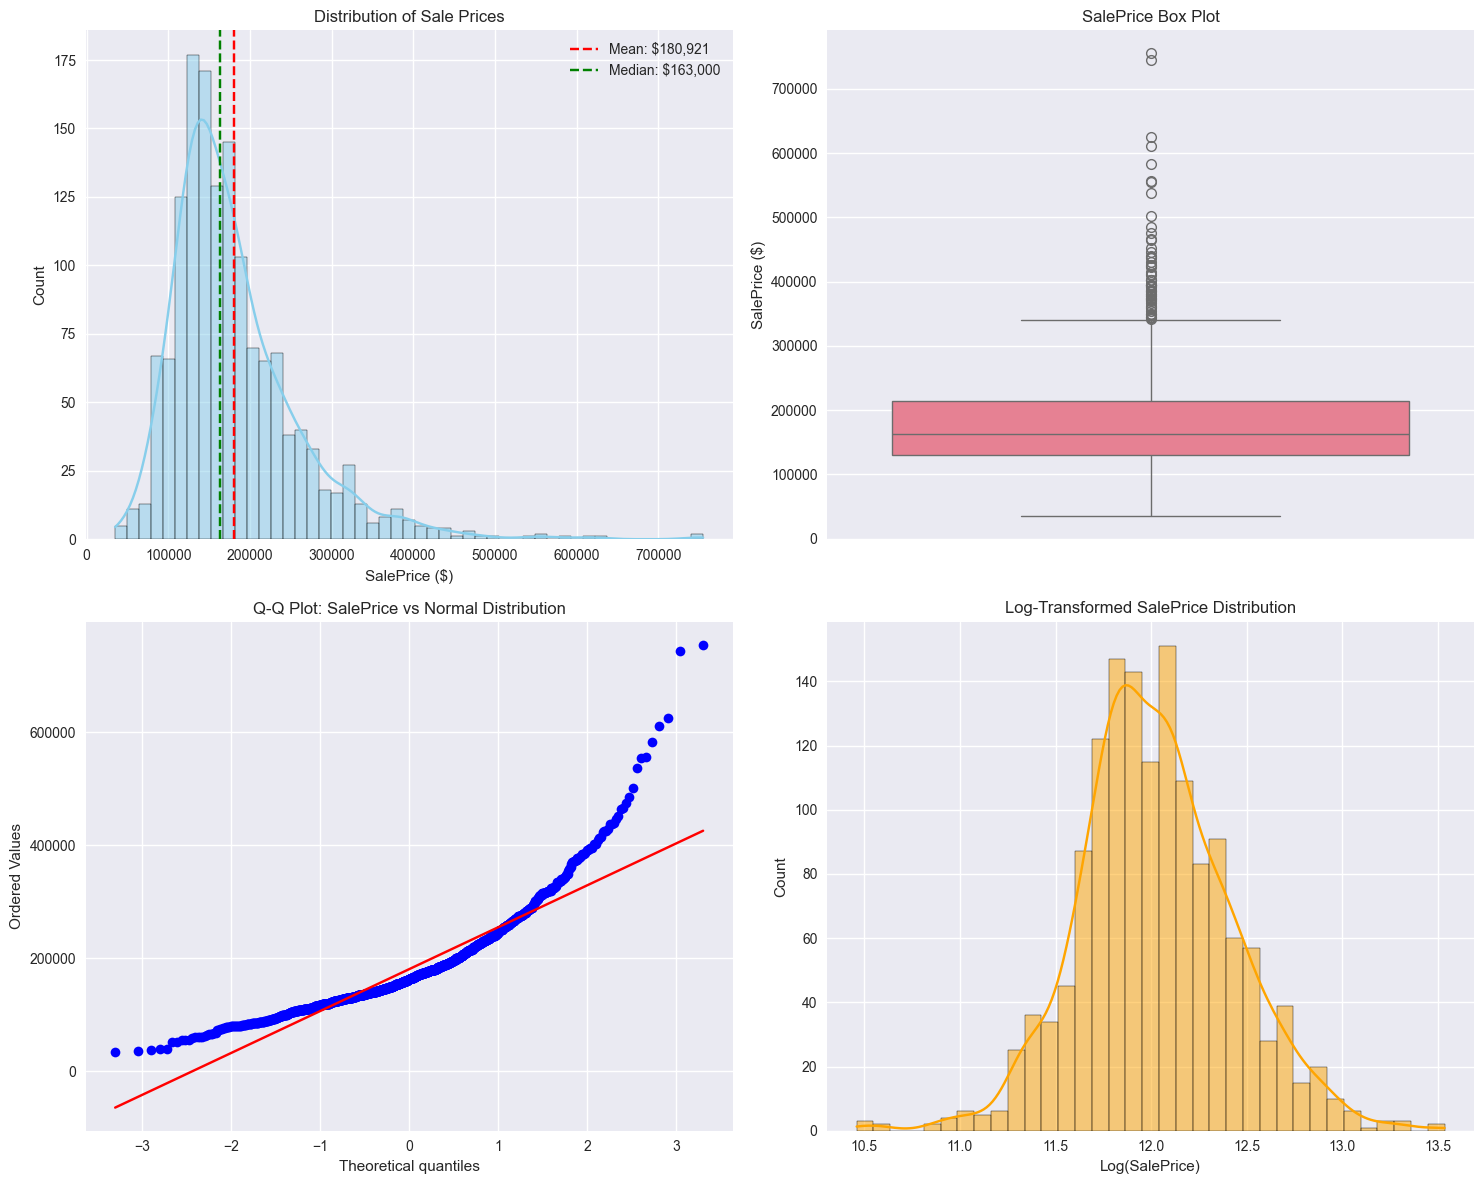

In [7]:
print("=== SALEPRICE ANALYSIS ===")

sale_price_stats = df['SalePrice'].describe()
print("SalePrice Statistics:")
print(sale_price_stats)

price_skew = skew(df['SalePrice'])
price_kurt = kurtosis(df['SalePrice'])
print(f"\nSkewness: {price_skew:.3f}")
print(f"Kurtosis: {price_kurt:.3f}")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.histplot(df['SalePrice'], kde=True, color='skyblue', ax=axes[0,0])
axes[0,0].set_title('Distribution of Sale Prices')
axes[0,0].set_xlabel('SalePrice ($)')
axes[0,0].axvline(df['SalePrice'].mean(), color='red', linestyle='--', label=f'Mean: ${df["SalePrice"].mean():,.0f}')
axes[0,0].axvline(df['SalePrice'].median(), color='green', linestyle='--', label=f'Median: ${df["SalePrice"].median():,.0f}')
axes[0,0].legend()

sns.boxplot(y=df['SalePrice'], ax=axes[0,1])
axes[0,1].set_title('SalePrice Box Plot')
axes[0,1].set_ylabel('SalePrice ($)')

stats.probplot(df['SalePrice'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot: SalePrice vs Normal Distribution')

log_prices = np.log1p(df['SalePrice'])
sns.histplot(log_prices, kde=True, color='orange', ax=axes[1,1])
axes[1,1].set_title('Log-Transformed SalePrice Distribution')
axes[1,1].set_xlabel('Log(SalePrice)')

plt.tight_layout()
plt.show()

=== CORRELATION ANALYSIS ===
Top 15 features correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
TotalArea       0.778959
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
TotalBaths      0.613005
1stFlrSF        0.605852
FullBath        0.560664
AreaPerRoom     0.540645
TotRmsAbvGrd    0.533723
HouseAge        0.522897
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


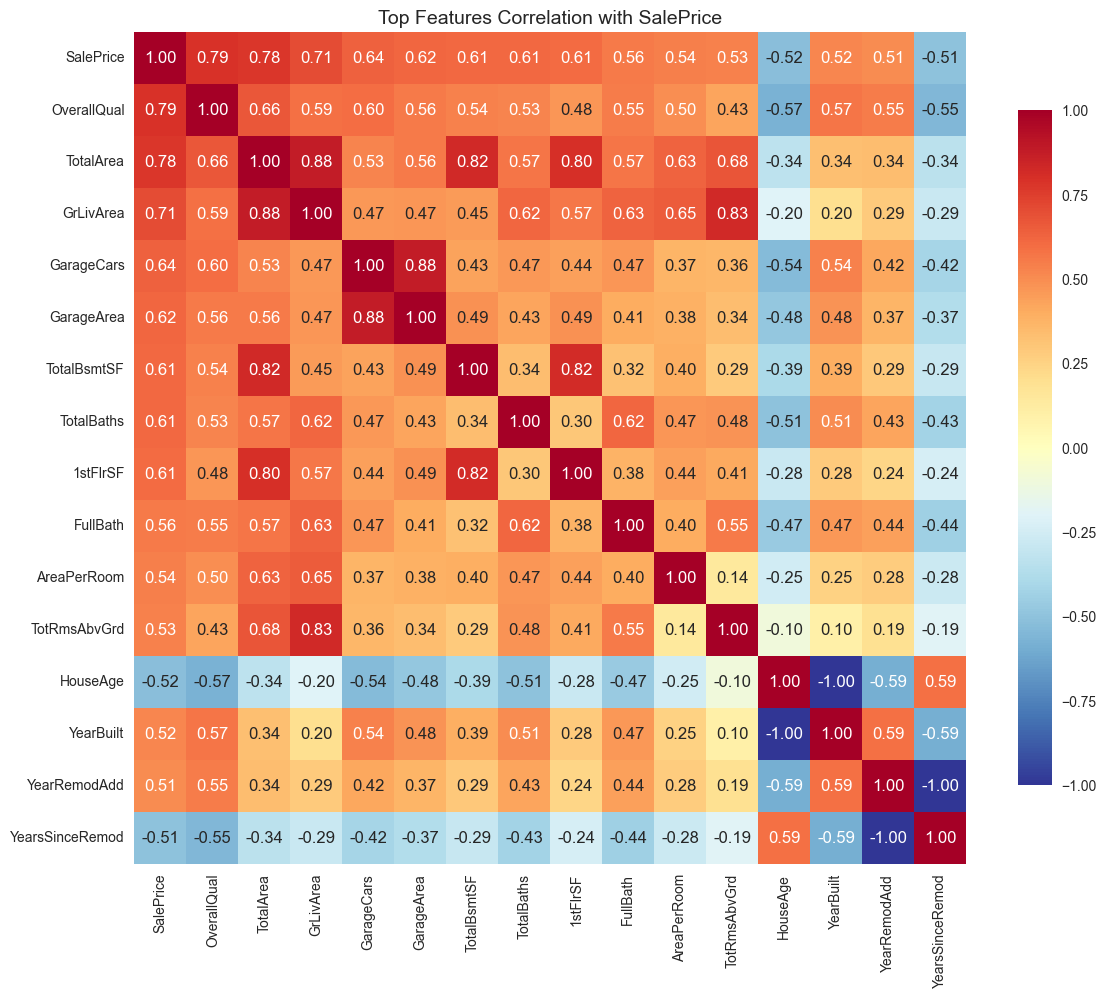

In [19]:
print("=== CORRELATION ANALYSIS ===")

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

price_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
print("Top 15 features correlated with SalePrice:")
print(price_corr.head(15))

top_features = price_corr.head(16).index.tolist()
top_corr = df[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr, annot=True, cmap='RdYlBu_r', center=0, 
           square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Top Features Correlation with SalePrice', fontsize=14)
plt.tight_layout()
plt.show()

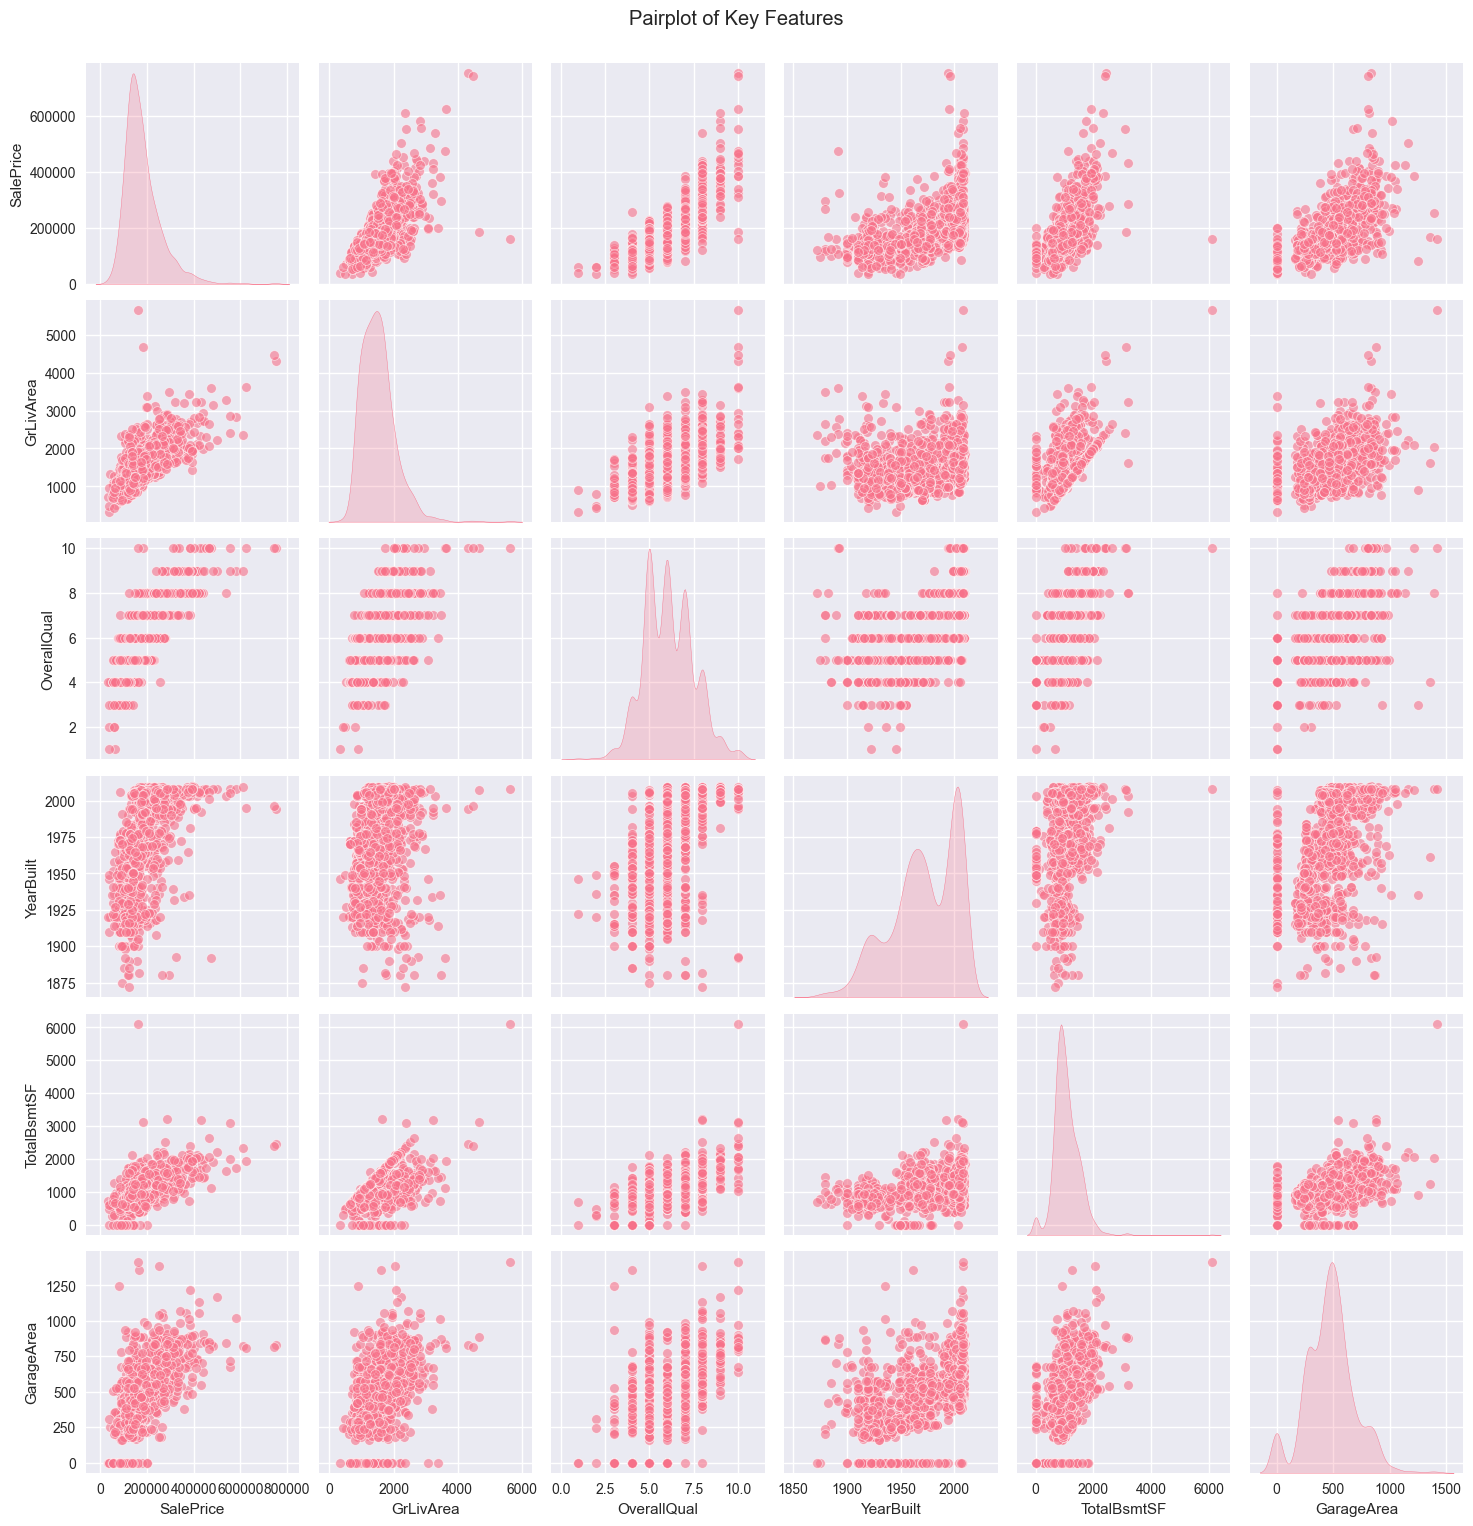

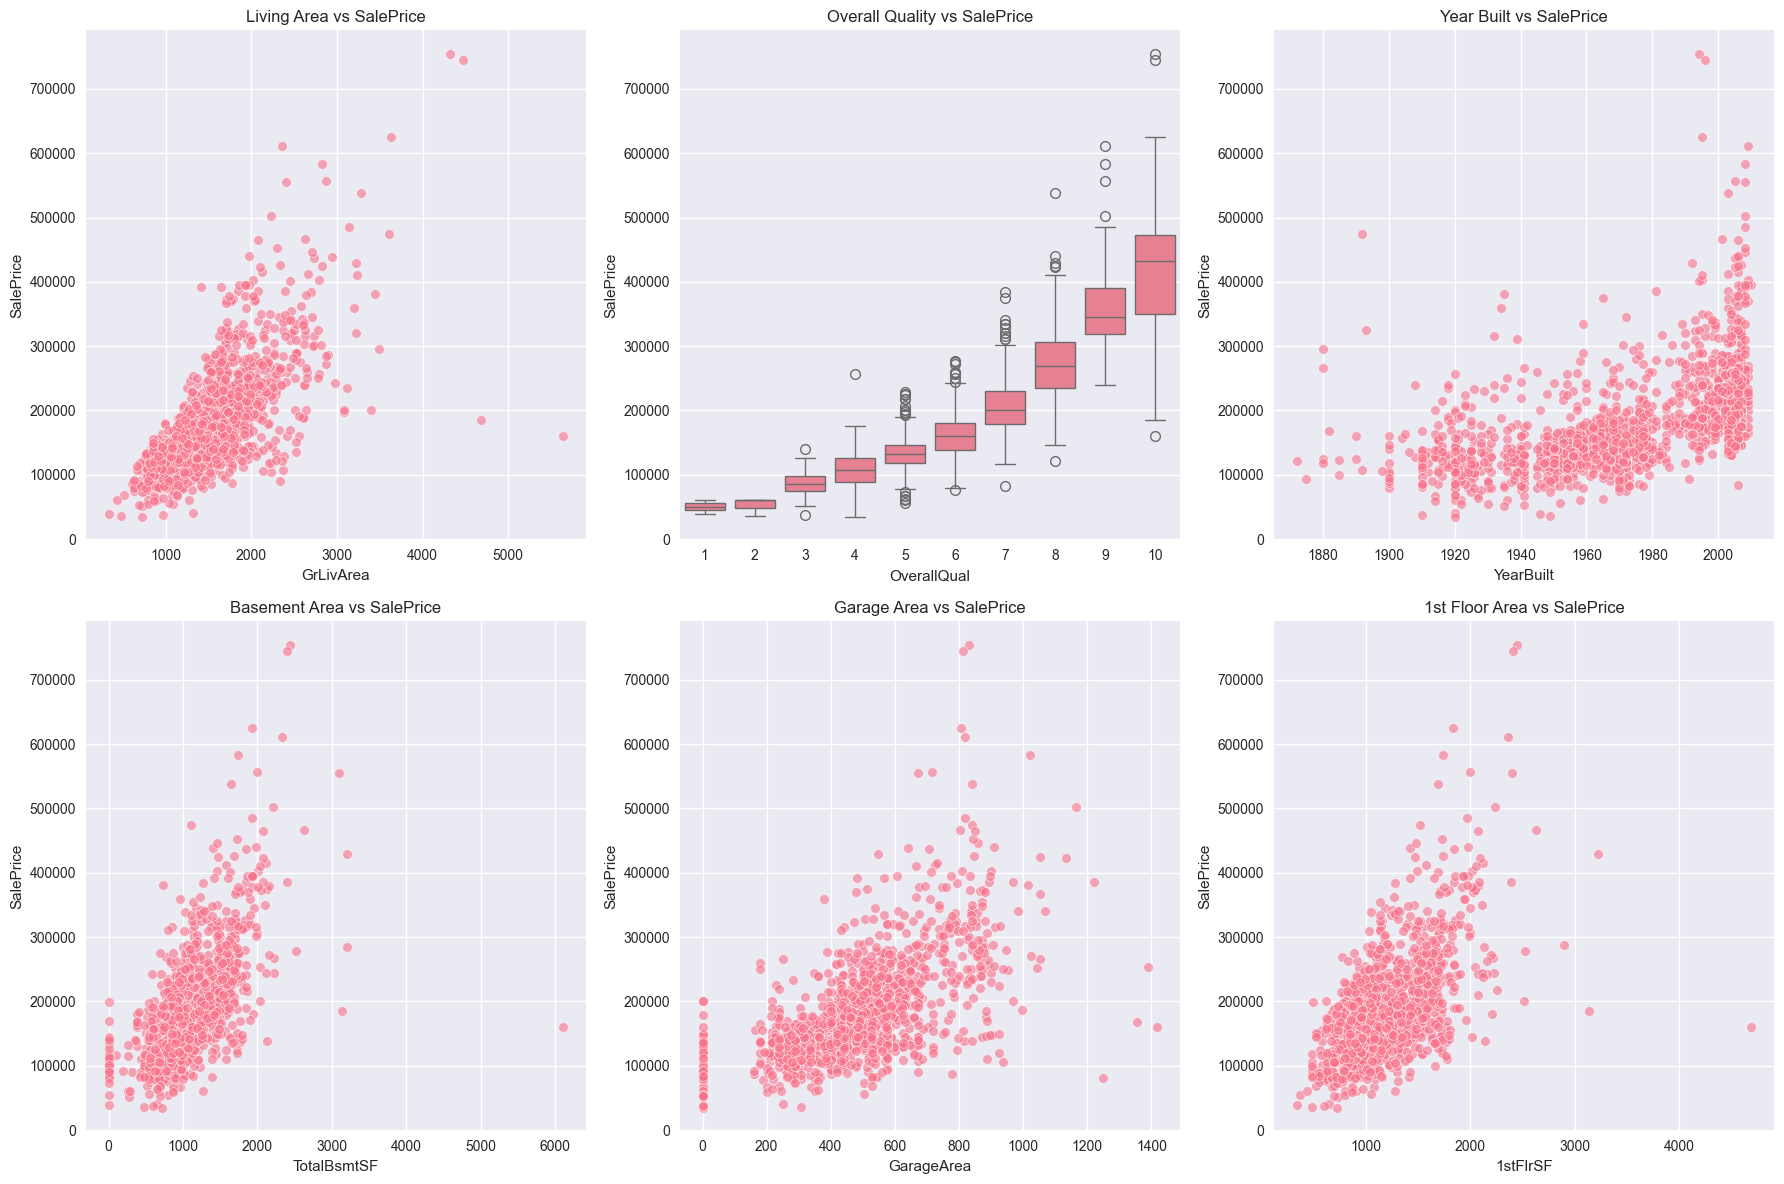

In [9]:
# Pairplot of main features
main_features = ['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GarageArea']
g = sns.pairplot(df[main_features], diag_kind='kde', plot_kws={'alpha': 0.6})
g.fig.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

# Feature relationships with SalePrice
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, alpha=0.6, ax=axes[0,0])
axes[0,0].set_title('Living Area vs SalePrice')

# OverallQual vs SalePrice
sns.boxplot(x='OverallQual', y='SalePrice', data=df, ax=axes[0,1])
axes[0,1].set_title('Overall Quality vs SalePrice')

# YearBuilt vs SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df, alpha=0.6, ax=axes[0,2])
axes[0,2].set_title('Year Built vs SalePrice')

# TotalBsmtSF vs SalePrice
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df, alpha=0.6, ax=axes[1,0])
axes[1,0].set_title('Basement Area vs SalePrice')

# GarageArea vs SalePrice
sns.scatterplot(x='GarageArea', y='SalePrice', data=df, alpha=0.6, ax=axes[1,1])
axes[1,1].set_title('Garage Area vs SalePrice')

# 1stFlrSF vs SalePrice
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=df, alpha=0.6, ax=axes[1,2])
axes[1,2].set_title('1st Floor Area vs SalePrice')

plt.tight_layout()
plt.show()

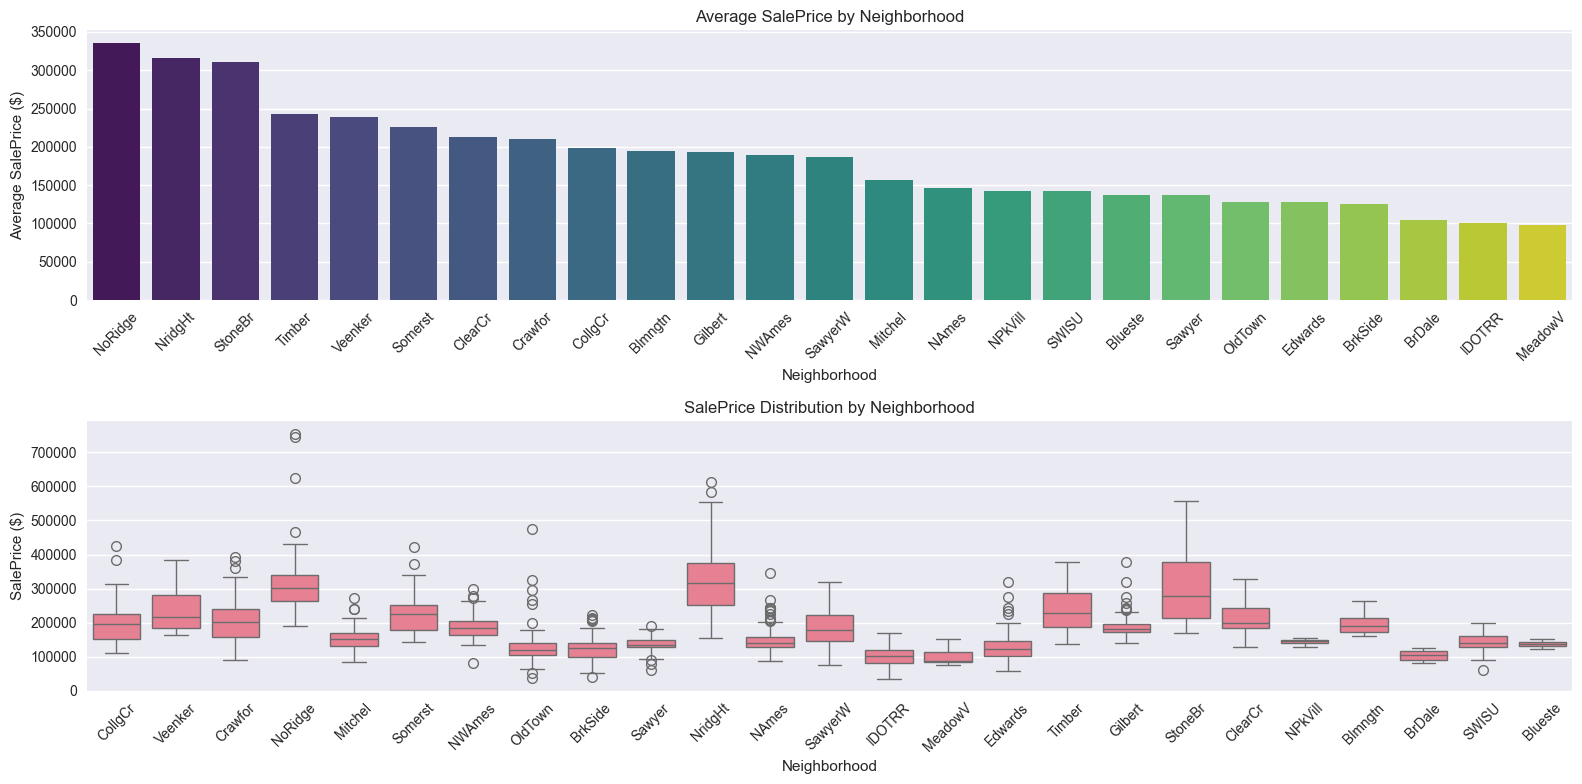

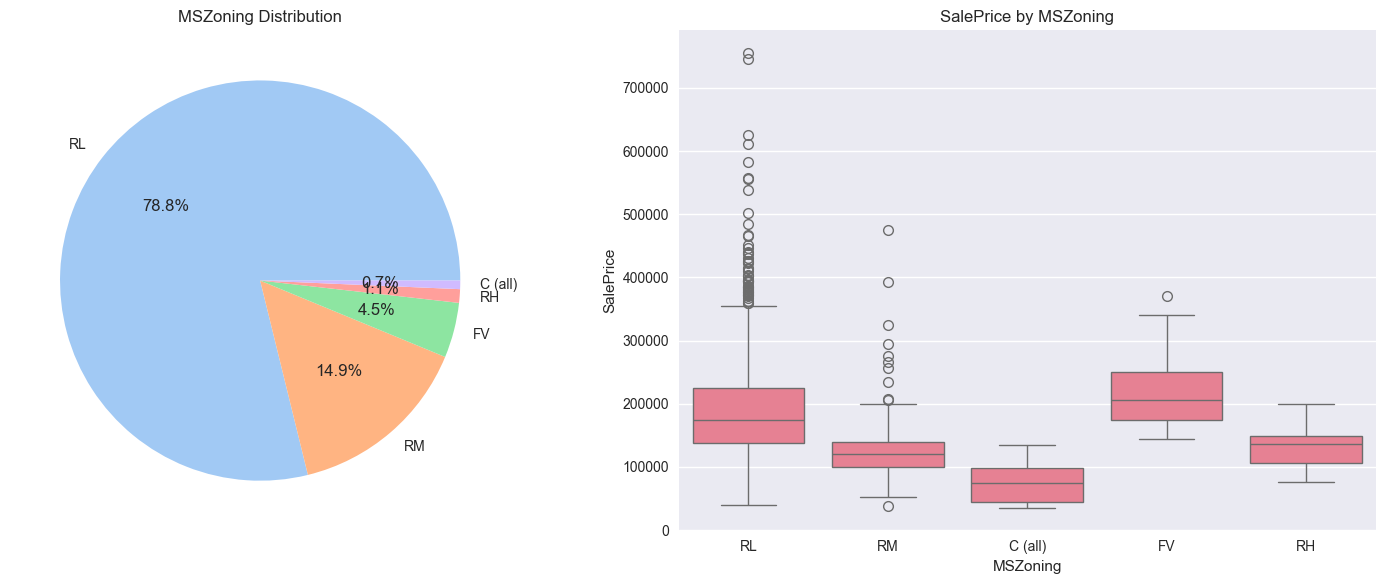

In [10]:
plt.figure(figsize=(16, 8))

# Neighborhood price distribution
neighborhood_stats = df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'count']).reset_index()
neighborhood_stats = neighborhood_stats.sort_values('mean', ascending=False)

plt.subplot(2, 1, 1)
sns.barplot(data=neighborhood_stats, x='Neighborhood', y='mean', palette='viridis')
plt.title('Average SalePrice by Neighborhood')
plt.xticks(rotation=45)
plt.ylabel('Average SalePrice ($)')

plt.subplot(2, 1, 2)
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.title('SalePrice Distribution by Neighborhood')
plt.xticks(rotation=45)
plt.ylabel('SalePrice ($)')

plt.tight_layout()
plt.show()

# MSZoning analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
zone_counts = df['MSZoning'].value_counts()
axes[0].pie(zone_counts.values, labels=zone_counts.index, autopct='%1.1f%%', 
           colors=sns.color_palette('pastel'))
axes[0].set_title('MSZoning Distribution')

# Box plot
sns.boxplot(x='MSZoning', y='SalePrice', data=df, ax=axes[1])
axes[1].set_title('SalePrice by MSZoning')

plt.tight_layout()
plt.show()

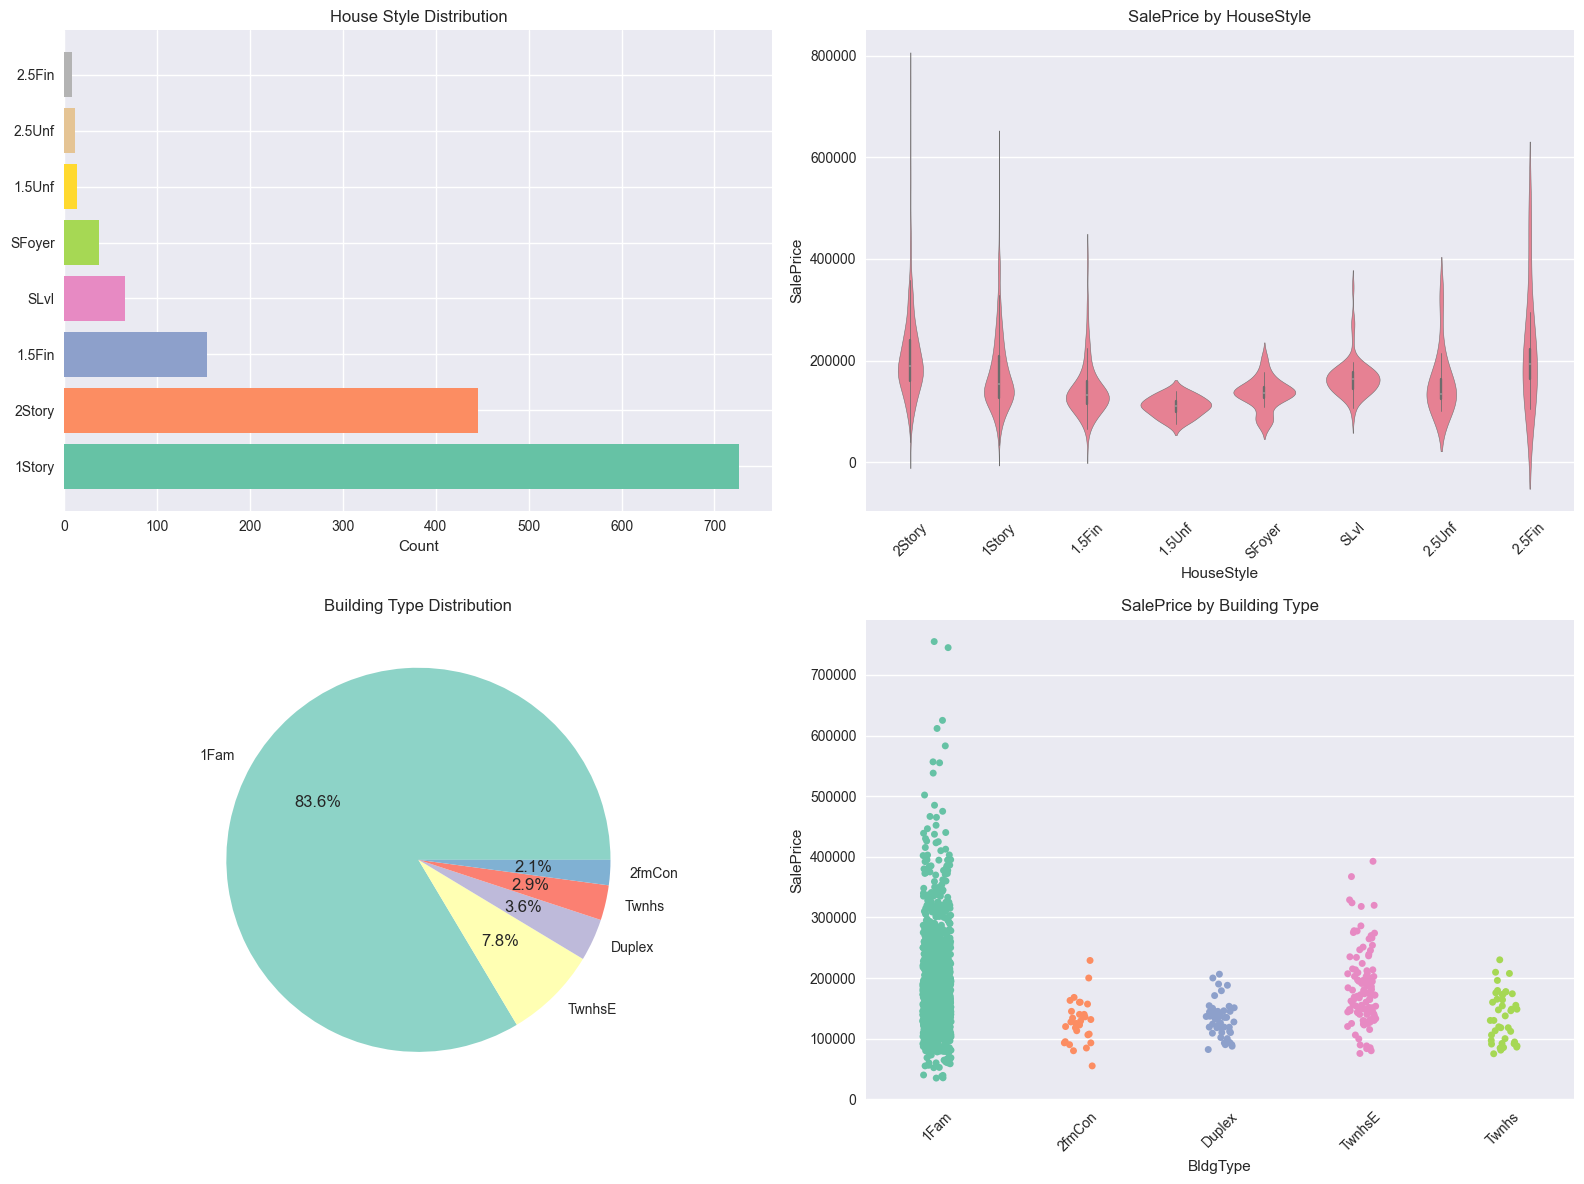

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# HouseStyle distribution
house_style_counts = df['HouseStyle'].value_counts()
axes[0,0].barh(range(len(house_style_counts)), house_style_counts.values, 
               color=sns.color_palette('Set2'))
axes[0,0].set_yticks(range(len(house_style_counts)))
axes[0,0].set_yticklabels(house_style_counts.index)
axes[0,0].set_title('House Style Distribution')
axes[0,0].set_xlabel('Count')

# SalePrice by HouseStyle (violin plot)
sns.violinplot(x='HouseStyle', y='SalePrice', data=df, ax=axes[0,1])
axes[0,1].set_title('SalePrice by HouseStyle')
axes[0,1].tick_params(axis='x', rotation=45)

# BldgType analysis
bldg_counts = df['BldgType'].value_counts()
axes[1,0].pie(bldg_counts.values, labels=bldg_counts.index, autopct='%1.1f%%',
              colors=sns.color_palette('Set3'))
axes[1,0].set_title('Building Type Distribution')

# SalePrice by BldgType (strip plot)
sns.stripplot(x='BldgType', y='SalePrice', data=df, jitter=True, 
             palette='Set2', ax=axes[1,1])
axes[1,1].set_title('SalePrice by Building Type')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

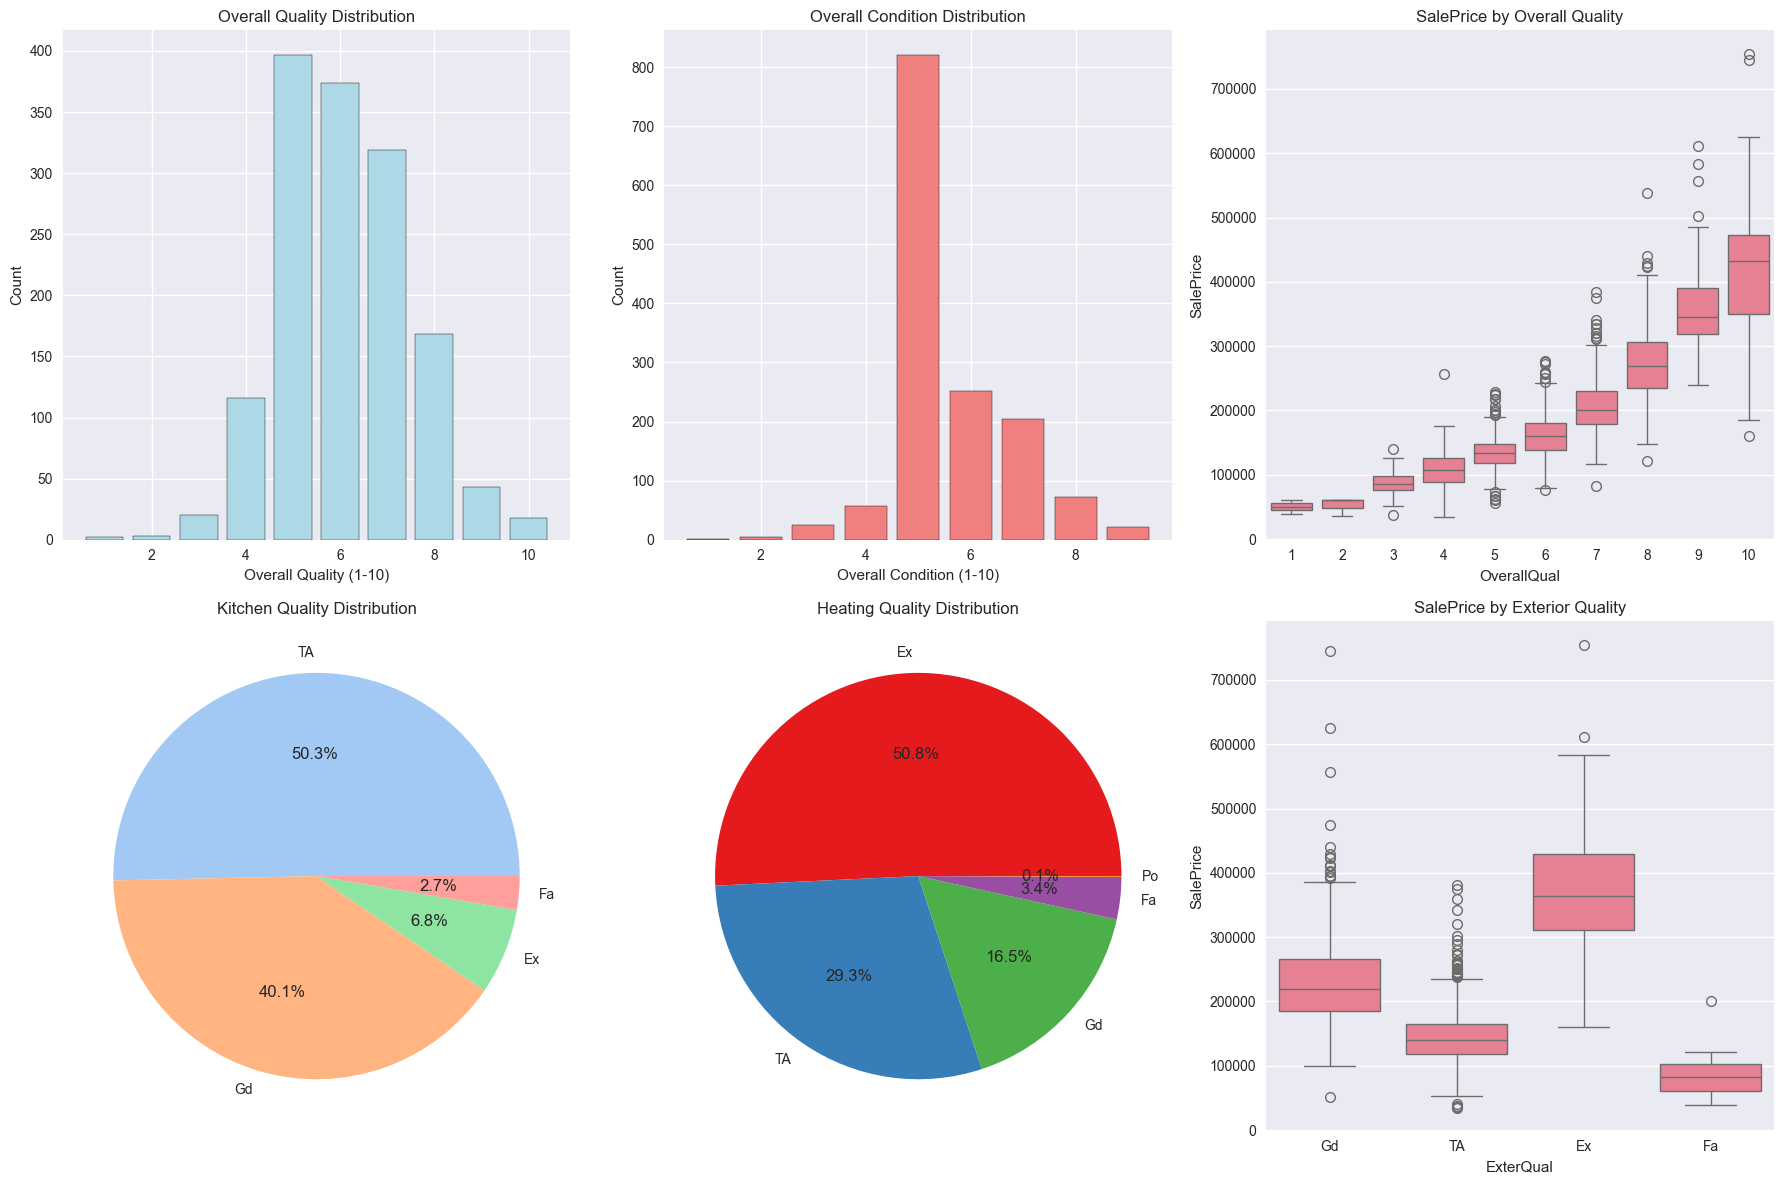

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Overall Quality
quality_counts = df['OverallQual'].value_counts().sort_index()
axes[0,0].bar(quality_counts.index, quality_counts.values, color='lightblue', edgecolor='black')
axes[0,0].set_title('Overall Quality Distribution')
axes[0,0].set_xlabel('Overall Quality (1-10)')
axes[0,0].set_ylabel('Count')

# Overall Condition
condition_counts = df['OverallCond'].value_counts().sort_index()
axes[0,1].bar(condition_counts.index, condition_counts.values, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Overall Condition Distribution')
axes[0,1].set_xlabel('Overall Condition (1-10)')
axes[0,1].set_ylabel('Count')

# Quality vs Price
sns.boxplot(x='OverallQual', y='SalePrice', data=df, ax=axes[0,2])
axes[0,2].set_title('SalePrice by Overall Quality')

# Kitchen Quality
kitchen_qual_counts = df['KitchenQual'].value_counts()
axes[1,0].pie(kitchen_qual_counts.values, labels=kitchen_qual_counts.index, 
              autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[1,0].set_title('Kitchen Quality Distribution')

# Heating Quality
heating_qual_counts = df['HeatingQC'].value_counts()
axes[1,1].pie(heating_qual_counts.values, labels=heating_qual_counts.index, 
              autopct='%1.1f%%', colors=sns.color_palette('Set1'))
axes[1,1].set_title('Heating Quality Distribution')

# External Quality vs Price
sns.boxplot(x='ExterQual', y='SalePrice', data=df, ax=axes[1,2])
axes[1,2].set_title('SalePrice by Exterior Quality')

plt.tight_layout()
plt.show()

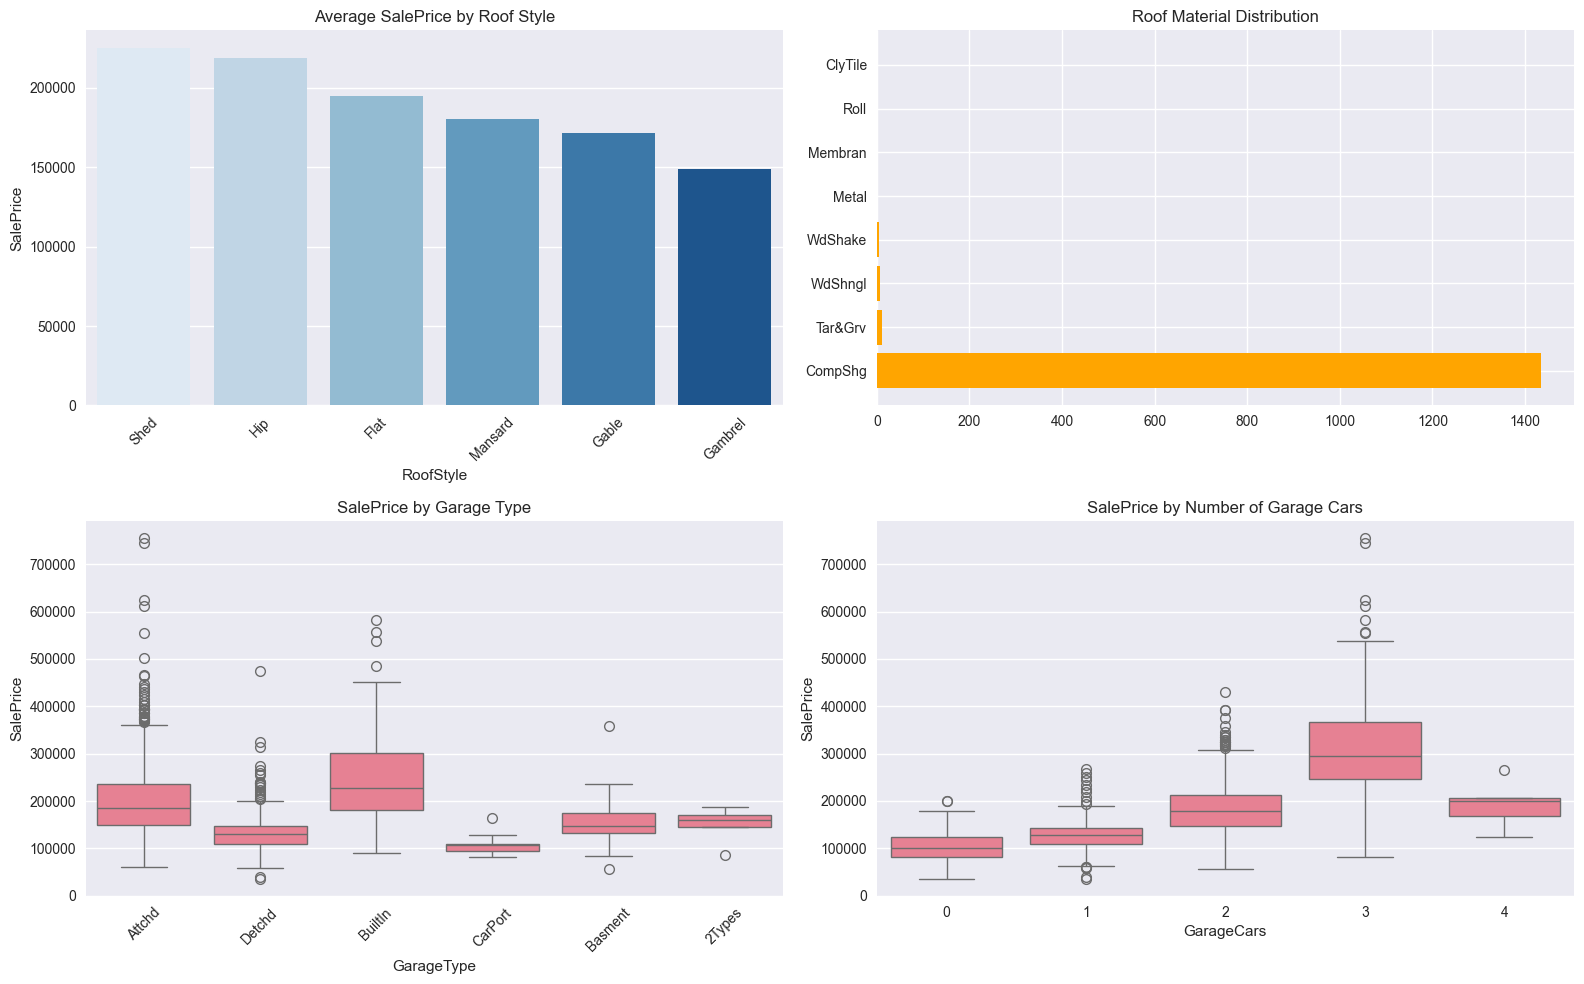

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Roof Style analysis
roof_price = df.groupby('RoofStyle')['SalePrice'].mean().reset_index().sort_values('SalePrice', ascending=False)
sns.barplot(data=roof_price, x='RoofStyle', y='SalePrice', palette='Blues', ax=axes[0,0])
axes[0,0].set_title('Average SalePrice by Roof Style')
axes[0,0].tick_params(axis='x', rotation=45)

# Roof Material
roof_matl_counts = df['RoofMatl'].value_counts()
axes[0,1].barh(range(len(roof_matl_counts)), roof_matl_counts.values, color='orange')
axes[0,1].set_yticks(range(len(roof_matl_counts)))
axes[0,1].set_yticklabels(roof_matl_counts.index)
axes[0,1].set_title('Roof Material Distribution')

# Garage Type vs Price
sns.boxplot(x='GarageType', y='SalePrice', data=df, ax=axes[1,0])
axes[1,0].set_title('SalePrice by Garage Type')
axes[1,0].tick_params(axis='x', rotation=45)

# Garage Cars vs Price
sns.boxplot(x='GarageCars', y='SalePrice', data=df, ax=axes[1,1])
axes[1,1].set_title('SalePrice by Number of Garage Cars')

plt.tight_layout()
plt.show()


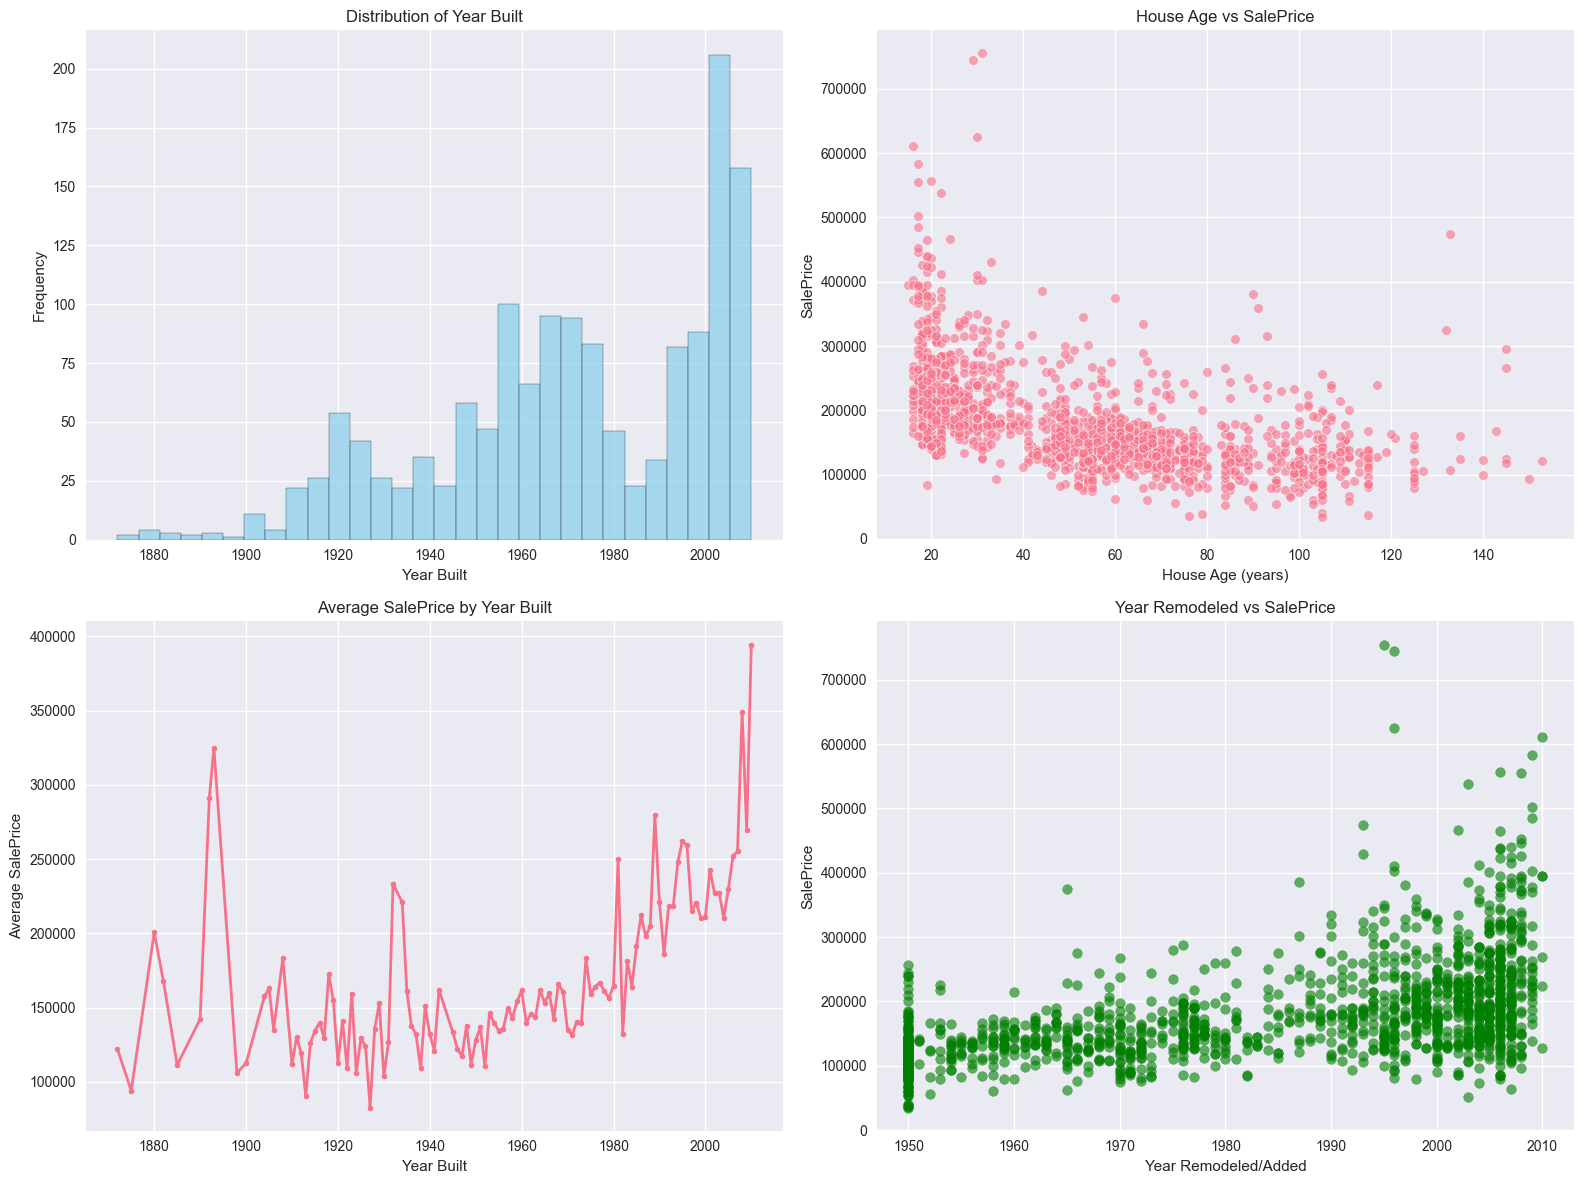

In [14]:
current_year = 2025
df['HouseAge'] = current_year - df['YearBuilt']
df['YearsSinceRemod'] = current_year - df['YearRemodAdd']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Year Built distribution
axes[0,0].hist(df['YearBuilt'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribution of Year Built')
axes[0,0].set_xlabel('Year Built')
axes[0,0].set_ylabel('Frequency')

# House Age vs Price
sns.scatterplot(x='HouseAge', y='SalePrice', data=df, alpha=0.6, ax=axes[0,1])
axes[0,1].set_title('House Age vs SalePrice')
axes[0,1].set_xlabel('House Age (years)')

# Year Built vs Price (trend over time)
yearly_avg = df.groupby('YearBuilt')['SalePrice'].mean().reset_index()
axes[1,0].plot(yearly_avg['YearBuilt'], yearly_avg['SalePrice'], marker='o', linewidth=2, markersize=4)
axes[1,0].set_title('Average SalePrice by Year Built')
axes[1,0].set_xlabel('Year Built')
axes[1,0].set_ylabel('Average SalePrice')

# Remodel effect
axes[1,1].scatter(df['YearRemodAdd'], df['SalePrice'], alpha=0.6, color='green')
axes[1,1].set_title('Year Remodeled vs SalePrice')
axes[1,1].set_xlabel('Year Remodeled/Added')
axes[1,1].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

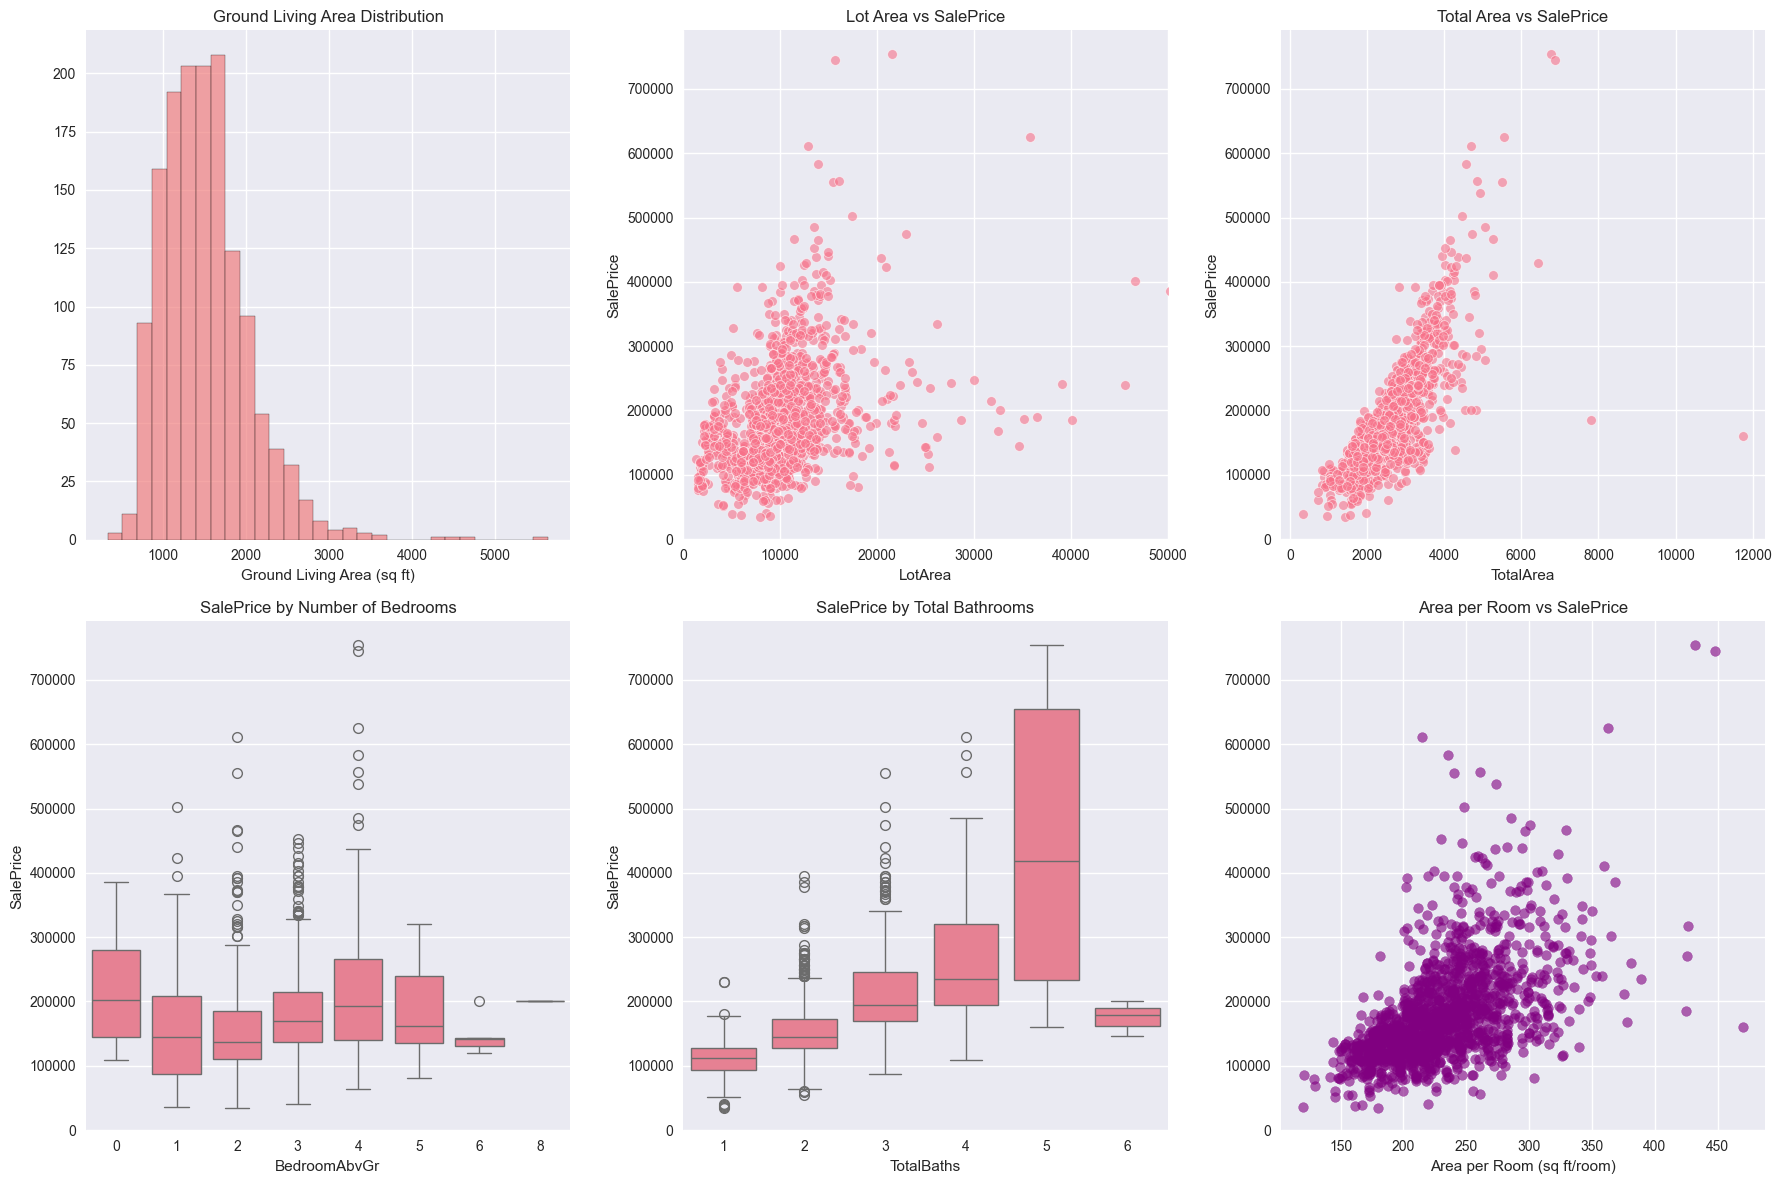

In [15]:
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']
df['AreaPerRoom'] = df['GrLivArea'] / df['TotRmsAbvGrd'].replace(0, 1)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Living Area distribution
axes[0,0].hist(df['GrLivArea'], bins=30, color='lightcoral', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Ground Living Area Distribution')
axes[0,0].set_xlabel('Ground Living Area (sq ft)')

# Lot Area vs Price
sns.scatterplot(x='LotArea', y='SalePrice', data=df, alpha=0.6, ax=axes[0,1])
axes[0,1].set_title('Lot Area vs SalePrice')
axes[0,1].set_xlim(0, 50000)  # Remove extreme outliers for better visualization

# Total Area vs Price
sns.scatterplot(x='TotalArea', y='SalePrice', data=df, alpha=0.6, ax=axes[0,2])
axes[0,2].set_title('Total Area vs SalePrice')

# Bedrooms vs Price
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df, ax=axes[1,0])
axes[1,0].set_title('SalePrice by Number of Bedrooms')

# Bathrooms analysis
df['TotalBaths'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']
sns.boxplot(x='TotalBaths', y='SalePrice', data=df, ax=axes[1,1])
axes[1,1].set_title('SalePrice by Total Bathrooms')

# Area per room
axes[1,2].scatter(df['AreaPerRoom'], df['SalePrice'], alpha=0.6, color='purple')
axes[1,2].set_title('Area per Room vs SalePrice')
axes[1,2].set_xlabel('Area per Room (sq ft/room)')

plt.tight_layout()
plt.show()

In [17]:
print("=== ADVANCED STATISTICAL ANALYSIS ===")

# Price statistics by key categories
print("\n1. Price Statistics by Overall Quality:")
quality_stats = df.groupby('OverallQual')['SalePrice'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
display(quality_stats)

print("\n2. Price Statistics by Neighborhood (Top 10 by average price):")
neighborhood_stats = df.groupby('Neighborhood')['SalePrice'].agg(['count', 'mean', 'std']).round(2)
neighborhood_stats = neighborhood_stats.sort_values('mean', ascending=False)
display(neighborhood_stats.head(10))

print("\n3. Feature Statistics Summary:")
numerical_features = ['GrLivArea', 'LotArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea']
feature_stats = df[numerical_features + ['SalePrice']].describe().round(2)
display(feature_stats)

# Outlier analysis
print("\n4. Outlier Analysis (using IQR method):")
def find_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers), len(outliers)/len(column)*100

outlier_analysis = {}
for col in ['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF']:
    count, percentage = find_outliers_iqr(df[col])
    outlier_analysis[col] = {'Count': count, 'Percentage': f"{percentage:.1f}%"}

outlier_df = pd.DataFrame(outlier_analysis).T
print("Outliers by feature:")
display(outlier_df)


=== ADVANCED STATISTICAL ANALYSIS ===

1. Price Statistics by Overall Quality:


,count,mean,std,min,max
OverallQual,,,,,
1,2,50150.00,15344.22,39300,61000
2,3,51770.33,14254.20,35311,60000
3,20,87473.75,24688.57,37900,139600
4,116,108420.66,29022.00,34900,256000
5,397,133523.35,27107.33,55993,228950
6,374,161603.03,36090.18,76000,277000
7,319,207716.42,44466.26,82500,383970
8,168,274735.54,63898.90,122000,538000
9,43,367513.02,81278.17,239000,611657



2. Price Statistics by Neighborhood (Top 10 by average price):


,count,mean,std
Neighborhood,,,
NoRidge,41,335295.32,121412.66
NridgHt,77,316270.62,96392.54
StoneBr,25,310499.00,112969.68
Timber,38,242247.45,64845.65
Veenker,11,238772.73,72369.32
Somerst,86,225379.84,56177.56
ClearCr,28,212565.43,50231.54
Crawfor,51,210624.73,68866.40
CollgCr,150,197965.77,51403.67



3. Feature Statistics Summary:


,GrLivArea,LotArea,YearBuilt,TotalBsmtSF,GarageArea,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,1515.46,10516.83,1971.27,1057.43,472.98,180921.2
std,525.48,9981.26,30.20,438.71,213.80,79442.5
min,334.00,1300.00,1872.00,0.00,0.00,34900.0
25%,1129.50,7553.50,1954.00,795.75,334.50,129975.0
50%,1464.00,9478.50,1973.00,991.50,480.00,163000.0
75%,1776.75,11601.50,2000.00,1298.25,576.00,214000.0
max,5642.00,215245.00,2010.00,6110.00,1418.00,755000.0



4. Outlier Analysis (using IQR method):
Outliers by feature:


,Count,Percentage
SalePrice,61,4.2%
GrLivArea,31,2.1%
LotArea,69,4.7%
TotalBsmtSF,61,4.2%


In [18]:
print("=== KEY INSIGHTS AND FINDINGS ===")
print("=" * 60)

print("\n📊 DATASET SUMMARY:")
print(f"• Total records: {len(df):,}")
print(f"• Total features: {df.shape[1]}")
print(f"• Numerical features: {len(numerical_cols)}")
print(f"• Categorical features: {len(categorical_cols)}")
print(f"• Missing value columns: {len(missing_df[missing_df['Missing Count'] > 0])}")

print(f"\n💰 SALEPRICE INSIGHTS:")
print(f"• Average price: ${df['SalePrice'].mean():,.0f}")
print(f"• Median price: ${df['SalePrice'].median():,.0f}")
print(f"• Price range: ${df['SalePrice'].min():,.0f} - ${df['SalePrice'].max():,.0f}")
print(f"• Standard deviation: ${df['SalePrice'].std():,.0f}")

print(f"\n🏠 KEY CORRELATIONS WITH PRICE:")
top_corr_features = price_corr.head(6)[1:]  # Exclude SalePrice itself
for feature, corr_val in top_corr_features.items():
    print(f"• {feature}: {corr_val:.3f}")

print(f"\n🏘️ NEIGHBORHOOD INSIGHTS:")
top_neighborhoods = neighborhood_stats.head(3)
for neighborhood in top_neighborhoods.index:
    avg_price = top_neighborhoods.loc[neighborhood, 'mean']
    print(f"• {neighborhood}: ${avg_price:,.0f} average")

print(f"\n⭐ QUALITY INSIGHTS:")
print(f"• Most common overall quality: {df['OverallQual'].mode()[0]}/10")
print(f"• Highest quality homes average: ${df[df['OverallQual'] >= 9]['SalePrice'].mean():,.0f}")
print(f"• Lowest quality homes average: ${df[df['OverallQual'] <= 3]['SalePrice'].mean():,.0f}")

print(f"\n🔧 DATA QUALITY NOTES:")
if len(missing_df[missing_df['Missing Count'] > 0]) > 0:
    most_missing = missing_df[missing_df['Missing Count'] > 0].index[0]
    missing_pct = missing_df.loc[most_missing, 'Missing Percentage']
    print(f"• Highest missing feature: {most_missing} ({missing_pct:.1f}%)")
else:
    print("• No missing values found")

print(f"• Potential outliers in SalePrice: {outlier_analysis['SalePrice']['Count']} ({outlier_analysis['SalePrice']['Percentage']})")

print(f"\n📈 RECOMMENDATIONS FOR MODELING:")
print("• Focus on: OverallQual, GrLivArea, TotalBsmtSF, GarageArea")
print("• Consider log transformation for SalePrice (right-skewed)")
print("• Handle missing values in garage, basement, and pool features")
print("• Feature engineering: House age, total area, price per sq ft")
print("• Consider neighborhood as a strong categorical predictor")

print("\n" + "=" * 60)
print("Analysis Complete! 🎉")
print("Dataset is ready for machine learning modeling.")

=== KEY INSIGHTS AND FINDINGS ===

📊 DATASET SUMMARY:
• Total records: 1,460
• Total features: 86
• Numerical features: 38
• Categorical features: 43
• Missing value columns: 19

💰 SALEPRICE INSIGHTS:
• Average price: $180,921
• Median price: $163,000
• Price range: $34,900 - $755,000
• Standard deviation: $79,443

🏠 KEY CORRELATIONS WITH PRICE:
• OverallQual: 0.791
• GrLivArea: 0.709
• GarageCars: 0.640
• GarageArea: 0.623
• TotalBsmtSF: 0.614

🏘️ NEIGHBORHOOD INSIGHTS:
• NoRidge: $335,295 average
• NridgHt: $316,271 average
• StoneBr: $310,499 average

⭐ QUALITY INSIGHTS:
• Most common overall quality: 5/10
• Highest quality homes average: $388,486
• Lowest quality homes average: $80,203

🔧 DATA QUALITY NOTES:
• Highest missing feature: PoolQC (99.5%)
• Potential outliers in SalePrice: 61 (4.2%)

📈 RECOMMENDATIONS FOR MODELING:
• Focus on: OverallQual, GrLivArea, TotalBsmtSF, GarageArea
• Consider log transformation for SalePrice (right-skewed)
• Handle missing values in garage, base